# 4.1. 선형 회귀


## 4.1.1. 정규방정식

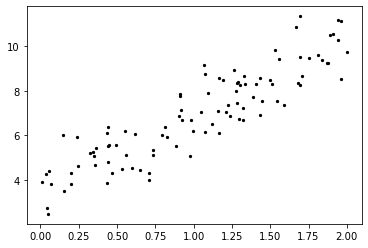

In [19]:
import numpy as np
import matplotlib.pyplot as plt


X = 2 * np.random.rand(100, 1) # Uniform distribution
y = 4 + 3 * X + np.random.randn(100, 1) # 표준정규분포

fig, sub = plt.subplots()

sub.scatter(X, y, s = 5, c = "k")

plt.show()

In [22]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[3.61988898],
       [3.2543139 ]])

In [23]:
X

array([[1.94453621],
       [1.69176016],
       [0.92012997],
       [1.43176911],
       [1.07618153],
       [0.90160559],
       [1.5425026 ],
       [1.99790686],
       [0.14794588],
       [0.15075087],
       [0.35909743],
       [1.49819559],
       [0.59678827],
       [1.23413412],
       [1.28130332],
       [1.43427897],
       [1.27527641],
       [1.88682564],
       [1.20952837],
       [0.23612377],
       [0.04811142],
       [1.22607788],
       [1.67082353],
       [0.46399746],
       [0.04378647],
       [0.24211665],
       [1.69602351],
       [0.73205149],
       [1.75436748],
       [0.97312809],
       [1.06954332],
       [1.96365468],
       [0.35175038],
       [1.16017667],
       [0.98298616],
       [0.43151833],
       [1.26450031],
       [0.70854589],
       [0.44496609],
       [0.6471479 ],
       [1.3006075 ],
       [0.43909959],
       [1.71027702],
       [1.33009732],
       [1.04721407],
       [1.09324598],
       [1.8725963 ],
       [0.794

In [24]:
X_b

array([[1.        , 1.94453621],
       [1.        , 1.69176016],
       [1.        , 0.92012997],
       [1.        , 1.43176911],
       [1.        , 1.07618153],
       [1.        , 0.90160559],
       [1.        , 1.5425026 ],
       [1.        , 1.99790686],
       [1.        , 0.14794588],
       [1.        , 0.15075087],
       [1.        , 0.35909743],
       [1.        , 1.49819559],
       [1.        , 0.59678827],
       [1.        , 1.23413412],
       [1.        , 1.28130332],
       [1.        , 1.43427897],
       [1.        , 1.27527641],
       [1.        , 1.88682564],
       [1.        , 1.20952837],
       [1.        , 0.23612377],
       [1.        , 0.04811142],
       [1.        , 1.22607788],
       [1.        , 1.67082353],
       [1.        , 0.46399746],
       [1.        , 0.04378647],
       [1.        , 0.24211665],
       [1.        , 1.69602351],
       [1.        , 0.73205149],
       [1.        , 1.75436748],
       [1.        , 0.97312809],
       [1.

In [25]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta_best)

y_predict

array([[ 3.61988898],
       [10.12851678]])

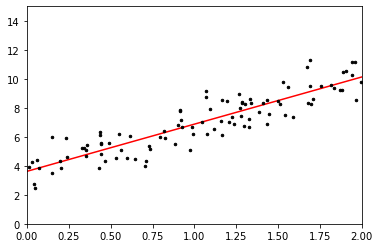

In [26]:
fig, sub = plt.subplots()

sub.plot(X_new, y_predict, "r-")
sub.plot(X, y, "k.", ms = 5)

sub.axis([0, 2, 0, 15])

plt.show()

In [27]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([3.61988898]), array([[3.2543139]]))

In [28]:
lin_reg.predict(X_new)

array([[ 3.61988898],
       [10.12851678]])

In [29]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)

theta_best_svd # 최소제곱법

array([[3.61988898],
       [3.2543139 ]])

In [30]:
np.linalg.pinv(X_b).dot(y) # 유사역행렬로 풀었을 때

array([[3.61988898],
       [3.2543139 ]])

# 4.2. 경사 하강법


## 4.2.1. 배치 경사 하강법

* 경사 하강법의 스텝

In [31]:
eta = 0.1
n_iterations = 1000
m = 100 # 샘플 개수

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    
    theta = theta - eta * gradients

theta

array([[3.61988898],
       [3.2543139 ]])

## 4.2.2. 확률적 경사 하강법

In [34]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m) # m보다 작은 랜덤한 숫자 하나 출력
        
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        
        theta = theta - eta * gradients

theta

array([[3.64216035],
       [3.27539763]])

In [35]:
from sklearn.linear_model import SGDRegressor


sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([3.59352549]), array([3.27224049]))

# 4.3. 다항 회귀

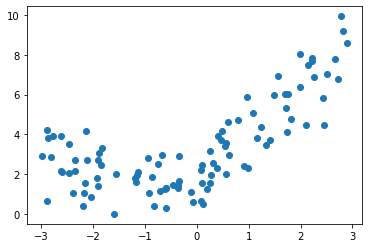

In [2]:
import numpy as np
import matplotlib.pyplot as plt

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [3]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

X[0], X_poly[0]

(array([-0.71448387]), array([-0.71448387,  0.51048721]))

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.17806187]), array([[1.01434055, 0.45402102]]))

# 4.4. 학습 곡선

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[: m], y_train[: m])
        y_train_predict = model.predict(X_train[: m])
        y_val_predict   = model.predict(X_val)
        
        train_errors.append(mean_squared_error(y_train[: m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", lw = 1, label = "훈련")
    plt.plot(np.sqrt(val_errors), "b-", lw = 1, label = "검증")
    plt.show()

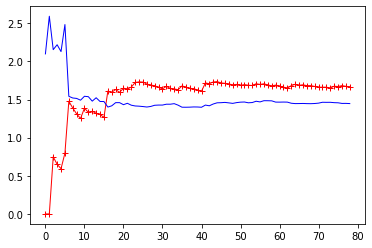

In [7]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

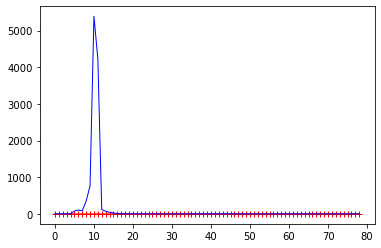

In [12]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
    ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)

# 4.5. 규제가 있는 선형 모델
## 4.5.1. 릿지 회귀

In [14]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X, y)

ridge_reg.predict([[1.5]])

array([[4.8093198]])

In [16]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty = "l2")
sgd_reg.fit(X, y.ravel())

sgd_reg.predict([[1.5]])

array([4.79485136])

## 4.5.2. 라쏘 회귀

In [17]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)

lasso_reg.predict([[1.5]])

array([4.75659426])

## 4.5.3. 엘라스틱넷

In [18]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)

elastic_net.predict([[1.5]])

array([4.76041667])

In [19]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 90, include_bias = False)),
    ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit(X_train)
X_val_poly_scaled   = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty, warm_start = True, penalty = None, learning_rate = "constant",\
                       eta0 = 0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

NameError: name 'X_train' is not defined

# 4.6. 로지스틱 회귀
## 4.6.1. 결정 경계

In [20]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [22]:
X = iris["data"][:, 3 :]
y = (iris["target"] == 2).astype(np.int)

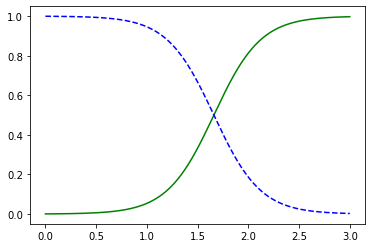

In [25]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", label = "Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label = "Not Iris virginica")

plt.show()

In [26]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## 4.6.4. 소프트맥스 회귀

In [27]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [28]:
softmax_reg.predict([[5, 2]])

array([2])

In [30]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [33]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')